In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sales_data.csv', encoding='Latin-1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [2]:
df.shape

(2823, 25)

In [3]:
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [4]:
df.columns = df.columns.str.upper()
print(f"# unique cities = {len(df['CITY'].unique())}")
print(f"# unique states = {len(df["STATE"].unique())}")
print(f"# unique postal codes = {len(df["POSTALCODE"].unique())}")
print(f"# unique countries = {len(df["COUNTRY"].unique())}")
print(f"# unique territories = {len(df["TERRITORY"].unique())}")

# unique cities = 73
# unique states = 17
# unique postal codes = 74
# unique countries = 19
# unique territories = 4


In [5]:
df.drop(["ORDERNUMBER", "PRICEEACH", "PHONE", "ADDRESSLINE1", "ADDRESSLINE2", "STATE", "TERRITORY", "POSTALCODE", "CONTACTLASTNAME", "CONTACTFIRSTNAME", "CUSTOMERNAME", "ORDERDATE"], axis = 'columns', inplace=True)

df.head()

,QUANTITYORDERED,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CITY,COUNTRY,DEALSIZE
0,30,2,2871.00,Shipped,1,2,2003,Motorcycles,95,S10_1678,NYC,USA,Small
1,34,5,2765.90,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims,France,Small
2,41,2,3884.34,Shipped,3,7,2003,Motorcycles,95,S10_1678,Paris,France,Medium
3,45,6,3746.70,Shipped,3,8,2003,Motorcycles,95,S10_1678,Pasadena,USA,Medium
4,49,14,5205.27,Shipped,4,10,2003,Motorcycles,95,S10_1678,San Francisco,USA,Medium


In [6]:
df.isna().sum()

QUANTITYORDERED    0
ORDERLINENUMBER    0
SALES              0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
CITY               0
COUNTRY            0
DEALSIZE           0
dtype: int64

# EDA

In [7]:
df.dtypes

QUANTITYORDERED      int64
ORDERLINENUMBER      int64
SALES              float64
STATUS              object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
CITY                object
COUNTRY             object
DEALSIZE            object
dtype: object

In [8]:
list_cat = df.select_dtypes(include=['object']).columns.tolist()
print(list_cat)

# for i in list_cat:
#   sns.countplot(data = data ,x = i)
#   plt.xticks(rotation = 45)
#   plt.show()

['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CITY', 'COUNTRY', 'DEALSIZE']


In [9]:
print(df['DEALSIZE'].unique(), f"- {len(df['DEALSIZE'].unique())}")
print(df['STATUS'].unique(), f"- {len(df['STATUS'].unique())}")
print(df['PRODUCTLINE'].unique(), f"- {len(df['PRODUCTLINE'].unique())}")
print(df['PRODUCTCODE'].unique(), f"- {len(df['PRODUCTCODE'].unique())}")

['Small' 'Medium' 'Large'] - 3
['Shipped' 'Disputed' 'In Process' 'Cancelled' 'On Hold' 'Resolved'] - 6
['Motorcycles' 'Classic Cars' 'Trucks and Buses' 'Vintage Cars' 'Planes'
 'Ships' 'Trains'] - 7
['S10_1678' 'S10_1949' 'S10_2016' 'S10_4698' 'S10_4757' 'S10_4962'
 'S12_1099' 'S12_1108' 'S12_1666' 'S12_2823' 'S12_3148' 'S12_3380'
 'S12_3891' 'S12_3990' 'S12_4473' 'S12_4675' 'S18_1097' 'S18_1129'
 'S18_1342' 'S18_1367' 'S18_1589' 'S18_1662' 'S18_1749' 'S18_1889'
 'S18_1984' 'S18_2238' 'S18_2248' 'S18_2319' 'S18_2325' 'S18_2432'
 'S18_2581' 'S18_2625' 'S18_2795' 'S18_2870' 'S18_2949' 'S18_2957'
 'S18_3029' 'S18_3136' 'S18_3140' 'S18_3232' 'S18_3259' 'S18_3278'
 'S18_3320' 'S18_3482' 'S18_3685' 'S18_3782' 'S18_3856' 'S18_4027'
 'S18_4409' 'S18_4522' 'S18_4600' 'S18_4668' 'S18_4721' 'S18_4933'
 'S24_1046' 'S24_1444' 'S24_1578' 'S24_1628' 'S24_1785' 'S24_1937'
 'S24_2000' 'S24_2011' 'S24_2022' 'S24_2300' 'S24_2360' 'S24_2766'
 'S24_2840' 'S24_2841' 'S24_2887' 'S24_2972' 'S24_3151' 'S24_31

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
df['DEALSIZE_ENC'] = le.fit_transform(df['DEALSIZE'])


categorical_cols_one_hot = ['PRODUCTLINE', 'COUNTRY']
df_encoded = pd.get_dummies(df, columns=categorical_cols_one_hot, drop_first=True)
df_encoded = df_encoded.drop(columns=['PRODUCTCODE', 'DEALSIZE', 'CITY'])

df['STATUS'] = df['STATUS'].replace('Shipped',1)
df['STATUS'] = df['STATUS'].replace('Resolved', 2)
df['STATUS'] = df['STATUS'].replace('Cancelled', 3)
df['STATUS'] = df['STATUS'].replace('On Hold', 4)
df['STATUS'] = df['STATUS'].replace('Disputed', 5)
df['STATUS'] = df['STATUS'].replace('In Process', 6)

print(df_encoded.shape)
df_encoded.head()

(2823, 33)


/tmp/ipykernel_57752/3952598828.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['STATUS'] = df['STATUS'].replace('In Process', 6)


,QUANTITYORDERED,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,DEALSIZE_ENC,PRODUCTLINE_Motorcycles,...,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,30,2,2871.00,Shipped,1,2,2003,95,2,True,...,False,False,False,False,False,False,False,False,False,True
1,34,5,2765.90,Shipped,2,5,2003,95,2,True,...,False,False,False,False,False,False,False,False,False,False
2,41,2,3884.34,Shipped,3,7,2003,95,1,True,...,False,False,False,False,False,False,False,False,False,False
3,45,6,3746.70,Shipped,3,8,2003,95,1,True,...,False,False,False,False,False,False,False,False,False,True
4,49,14,5205.27,Shipped,4,10,2003,95,1,True,...,False,False,False,False,False,False,False,False,False,True


In [11]:
# Scale the data
from sklearn.preprocessing import StandardScaler

# Select only numeric columns (after encoding)
X = df_encoded.select_dtypes(include=['number'])

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

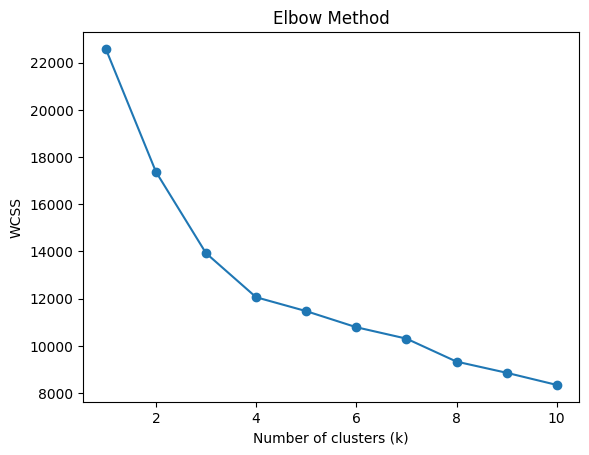

In [12]:
# use scaled data in the elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1, 11), WCSS, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    print(f"k={k}: silhouette={score:.3f}")

k=2: silhouette=0.233
k=3: silhouette=0.223
k=4: silhouette=0.223
k=5: silhouette=0.217
k=6: silhouette=0.190
k=7: silhouette=0.180


In [15]:
# Fit model. Choose k=4 (from elbow)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
df_encoded['cluster'] = kmeans.labels_

# distribution of clusters
print(df_encoded['cluster'].value_counts())

cluster
1    862
3    739
0    667
2    555
Name: count, dtype: int64


In [16]:
print(kmeans.labels_)
print(kmeans.inertia_) # WCSS (Within-Cluster Sum of Squares) — i.e., the total squared distance of all points to their respective cluster centers. Lower inertia → points are closer to their cluster centers → clusters are tighter and more compact.
print(kmeans.n_iter_) # number of iterations (updates) the K-Means algorithm took to converge.
print(kmeans.cluster_centers_) # Each row represents the centroid (mean position) of one cluster in the scaled feature space.

[2 2 1 ... 0 2 0]
12058.596958093365
19
[[ 0.52215086 -0.15291518  0.70661783 -1.04963053 -1.03162749  0.50865004
   0.44923369 -0.86505965]
 [ 0.32317253  0.04855318  0.6545877   0.80385623  0.78861222 -0.3997826
   0.56766973 -0.81191794]
 [-0.47997195  0.02698389 -0.81113222 -1.04681846 -1.03658836  0.46007912
  -0.58362925  0.98797859]
 [-0.48667803  0.0611001  -0.7901834   0.79590216  0.78973913 -0.33837929
  -0.62768687  0.98341624]]


# Evaluation

In [18]:
# Silhouette Score: Measures how similar a point is to its own cluster compared to other clusters.
# Range: −1 to 1
#     +1 → well-separated clusters
#     0 → overlapping clusters
#     −1 → points assigned to wrong cluster

score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.223
